In [1]:
import os
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_ollama import ChatOllama
from langchain_huggingface import HuggingFaceEmbeddings  # HuggingFace嵌入

load_dotenv("../.env")

model = ChatOpenAI(
                    temperature=0,
                    max_tokens=4096,
                    presence_penalty=1.2,
                    # model='deepseek-chat',
                    # openai_api_key=os.getenv('DEEPSEEK_API_KEY'),
                    # openai_api_base="https://api.deepseek.com/v1",
                    model='gpt-4o-mini',
                    openai_api_key=os.getenv('CLOSEAI_API_KEY'),
                    openai_api_base="https://api.openai-proxy.org/v1",
                )

# model = ChatOllama(
#                     temperature=0,
#                     num_predict=4096,
#                     repeat_penalty=1.2,
#                     model="llama3.2:3b"
#                 )

embedding = HuggingFaceEmbeddings(
            model_name="../../../../Embedding/maidalun/bce-embedding-base_v1",
            model_kwargs={"device": "cuda",
                          "trust_remote_code": True},
            encode_kwargs={"normalize_embeddings": True},
        )

c:\Users\farben\anaconda3\envs\lclg\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Without returning state

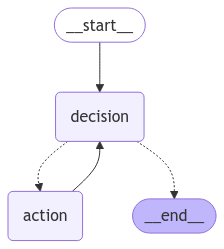

In [2]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from langgraph.graph import START, END


class State(TypedDict):
    value: str
    action_result: str


def router(state: State):
    if state["value"] == "end":
        return END
    else:
        return "action"


def decision_node(state):
    return {"value": "keep going!"}


def action_node(state: State):
    # Do your action here ...
    return {"action_result": "what a great result!"}


workflow = StateGraph(State)
workflow.add_node("decision", decision_node)
workflow.add_node("action", action_node)
workflow.add_edge(START, "decision")
workflow.add_conditional_edges("decision", router, ["action", END])
workflow.add_edge("action", "decision")
app = workflow.compile()

app

In [3]:
from langgraph.errors import GraphRecursionError

try:
    app.invoke({"value": "hi!"})
except GraphRecursionError:
    print("Recursion Error")

Recursion Error


# With returning state

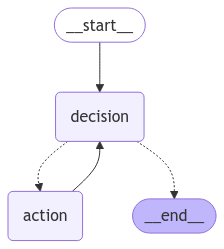

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph
from typing import Annotated

from langgraph.managed.is_last_step import RemainingSteps


class State(TypedDict):
    value: str
    action_result: str
    remaining_steps: RemainingSteps


def router(state: State):
    # Force the agent to end
    if state["remaining_steps"] <= 2:
        return END
    if state["value"] == "end":
        return END
    else:
        return "action"


def decision_node(state):
    return {"value": "keep going!"}


def action_node(state: State):
    # Do your action here ...
    return {"action_result": "what a great result!"}


workflow = StateGraph(State)
workflow.add_node("decision", decision_node)
workflow.add_node("action", action_node)
workflow.add_edge(START, "decision")
workflow.add_conditional_edges("decision", router, ["action", END])
workflow.add_edge("action", "decision")
app = workflow.compile()

app

In [5]:
app.invoke({"value": "hi!"})

{'value': 'keep going!', 'action_result': 'what a great result!'}